In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

In [11]:
df1 = pd.read_csv(r"C:\Users\Sanskar Bansal\Desktop\Time Series Forecasting and Anomaly Detection for Household Energy Consumption\Datasets\Electric_Appliances.csv")
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1[df1['Date'].dt.year == 2020]
df1.reset_index(drop=True, inplace=True)
df1.head(2)

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [12]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z

In [13]:
df1['kap_zscore'] = zscore(df1['Kitchen Appliances'], 30)
df1['fridge_zscore'] = zscore(df1['Fridge'], 30)
df1['ac_zscore'] = zscore(df1['AC'], 30)
df1['oap_zscore'] = zscore(df1['Other Appliances'], 30)
df1['wm_zscore'] = zscore(df1['Washing Machine'], 3)

In [14]:
df1[df1['kap_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [15]:
df1[df1['fridge_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [16]:
df1[df1['ac_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [17]:
df1[df1['oap_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [18]:
df1[df1['wm_zscore'] > 3]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


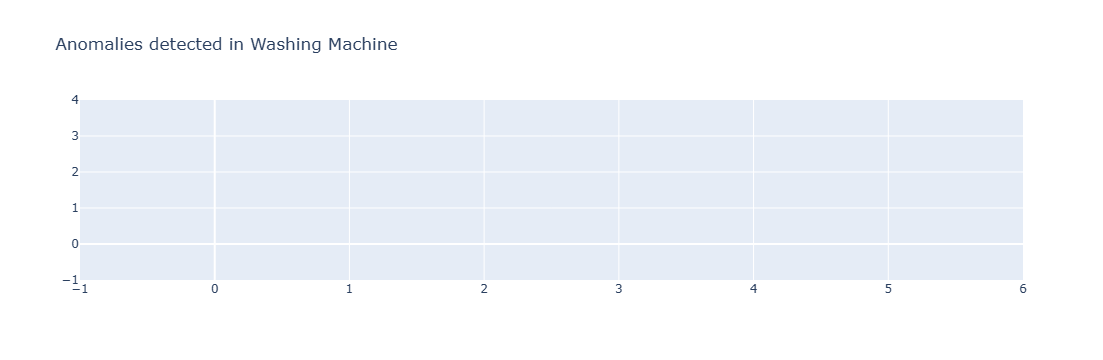

In [19]:
fig = go.Figure()
df_anoms = df1[df1['wm_zscore'] > 3]
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Washing Machine'],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=df_anoms['Date'], y=df_anoms['Washing Machine'],
                    mode='markers',
                    name='lines'))
fig.update_layout(title='Anomalies detected in Washing Machine')